<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Neural Network Framework (Keras)

## *Data Science Unit 4 Sprint 2 Assignmnet 3*

## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- Normalize the data (all features should have roughly the same scale)
- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task
- Compile your model
- Fit your model and report its accuracy in terms of Mean Squared Error
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

In [10]:
# Imports
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import boston_housing

In [5]:
# Import data from keras
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

57344/57026 [==============================] - 0s 1us/step


In [17]:
# Use sklearn to understand data 
from sklearn.datasets import load_boston

boston = load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [25]:
# Normalize data
from sklearn.preprocessing import Normalizer

norm = Normalizer()

X_train_n = norm.fit_transform(X_train)
X_test_n = norm.fit_transform(X_test)

In [32]:
# Create model architecture
model = Sequential(name="BaselineNN")

model.add(Dense(13, input_dim=13, activation='relu'))
model.add(Dense(13, activation='relu'))
model.add(Dense(13, activation='relu'))
model.add(Dense(13, activation='relu'))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam', metrics=['mse'])

model.summary()

Model: "BaselineNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 13)                182       
_________________________________________________________________
dense_3 (Dense)              (None, 13)                182       
_________________________________________________________________
dense_4 (Dense)              (None, 13)                182       
_________________________________________________________________
dense_5 (Dense)              (None, 13)                182       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 14        
Total params: 742
Trainable params: 742
Non-trainable params: 0
_________________________________________________________________


In [45]:
# fit model on train data
history = model.fit(X_train_n, y_train, epochs=250, validation_split=.10, verbose=False)

In [56]:
# Look at final metrics from model
print("\n MSE: $", model.evaluate(X_train_n, y_train)[0]*1000)

404/404 [==============================] - 0s 195us/sample - loss: 12.8859 - mse: 12.8859

 MSE: $ 12885.88040417964


In [67]:
# Look at metrics on test data
print("\n MSE: $", model.evaluate(X_test_n, y_test)[0]*1000)

102/102 [==============================] - 0s 561us/sample - loss: 30.7462 - mse: 30.7462

 MSE: $ 30746.194128896677


In [48]:
dir(history.history)

['__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'clear',
 'copy',
 'fromkeys',
 'get',
 'items',
 'keys',
 'pop',
 'popitem',
 'setdefault',
 'update',
 'values']

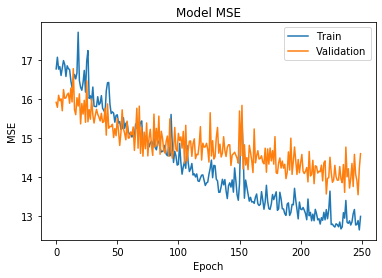

In [63]:
# visualize model by mse
import matplotlib.pyplot as plt

# plot training & validation MSE values
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('Model MSE')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

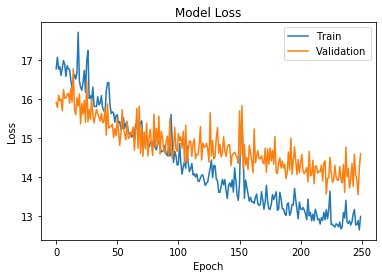

In [61]:
# visualize model by loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

In [88]:
# Try Linear Regression Model
from sklearn.ensemble import GradientBoostingRegressor

reg = GradientBoostingRegressor(
    n_estimators=200,
    min_samples_leaf=10,
    max_depth=10)

# Fit model
reg.fit(X_train_n, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=10,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=10, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [89]:
# Get MAE for test & train data

from sklearn.metrics import mean_squared_error

y_pred_train = reg.predict(X_train_n)
mse = 1000 * (mean_squared_error(y_train, y_pred_train))
print(f'Train MSE: ${mse}')

y_pred_test = reg.predict(X_test_n)
mse = 1000 * (mean_squared_error(y_test, y_pred_test))
print(f'Test MSE: ${mse}')

Train MSE: $47.33344303883049
Test MSE: $15014.296835279478


## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels
- Make sure to have your final layer have as many nodes as the number of classes that you want to predict.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

In [106]:
# Imports
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

import numpy as np

In [108]:
# Load data
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 7s 2us/step


In [122]:
# Set hyper parameter variables
batch_size = 64
num_classes = 10
epochs = 100

In [111]:
# Reshape the data
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

In [112]:
# Change type to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [114]:
# Change y to correct encoding for output
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [120]:
mnist_model = Sequential(name='BaselineMnist')

# Input -> Hidden
mnist_model.add(Dense(16, input_dim=784, activation='relu'))
# Hidden
mnist_model.add(Dense(16, activation='relu'))
mnist_model.add(Dense(16, activation='relu'))
mnist_model.add(Dense(16, activation='relu'))
# Output
mnist_model.add(Dense(10, activation='softmax'))

# Compile
mnist_model.compile(loss='categorical_crossentropy',
                   optimizer='adam',
                   metrics=['accuracy'])

mnist_model.summary()

Model: "BaselineMnist"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 16)                12560     
_________________________________________________________________
dense_13 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_14 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_15 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_16 (Dense)             (None, 10)                170       
Total params: 13,546
Trainable params: 13,546
Non-trainable params: 0
_________________________________________________________________


In [125]:
# fit model on train data
history = mnist_model.fit(X_train, 
                    y_train, 
                    batch_size=batch_size,
                    epochs=epochs, 
                    validation_split=.10, 
                    verbose=False)
scores = mnist_model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 33us/sample - loss: 0.5325 - accuracy: 0.8498


In [149]:
# Print scores
val_acc = max(history.history['val_accuracy'])
print(f'Best Validation Accuracy: {val_acc:.2%}')
print(f'Test Accuracy: {scores[1]:.2%}')

Best Validation Accuracy: 86.27%
Test Accuracy: 84.98%


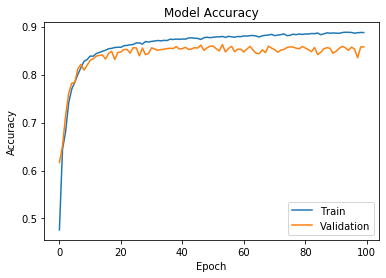

In [151]:
# Visualize Accuracies
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

In [152]:
# Try some different parameters
mnist_model = Sequential(name='SecondMnist')

# Input -> Hidden
mnist_model.add(Dense(16, input_dim=784, activation='relu'))
# Hidden
mnist_model.add(Dense(16, activation='relu'))
mnist_model.add(Dense(16, activation='relu'))
mnist_model.add(Dense(16, activation='relu'))
mnist_model.add(Dense(16, activation='relu'))
mnist_model.add(Dense(16, activation='relu'))
# Output
mnist_model.add(Dense(10, activation='softmax'))

# Compile
mnist_model.compile(loss='categorical_crossentropy',
                   optimizer='adadelta',
                   metrics=['accuracy'])

mnist_model.summary()

Model: "SecondMnist"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 16)                12560     
_________________________________________________________________
dense_18 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_19 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_20 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_21 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_22 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_23 (Dense)             (None, 10)                

In [153]:
# fit model on train data
history = mnist_model.fit(X_train, 
                    y_train, 
                    batch_size=batch_size,
                    epochs=epochs, 
                    validation_split=.10, 
                    verbose=False)
scores = mnist_model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 42us/sample - loss: 1.4664 - accuracy: 0.4694


In [154]:
# Print scores
val_acc = max(history.history['val_accuracy'])
print(f'Best Validation Accuracy: {val_acc:.2%}')
print(f'Test Accuracy: {scores[1]:.2%}')

Best Validation Accuracy: 47.68%
Test Accuracy: 46.94%


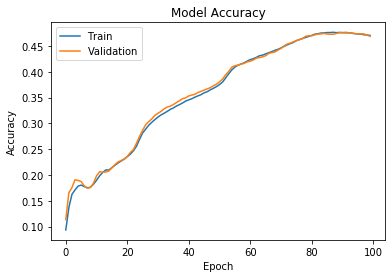

In [155]:
# Visualize Accuracies
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.